In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 2D mesh

This notebook shows how to pad a 2D mesh. Note that padding a 2d mesh is done on the contour (before triangulation).

### Generating some data

This cell generates a simple 2d plane.

(48, 120)


<IPython.core.display.Javascript object>


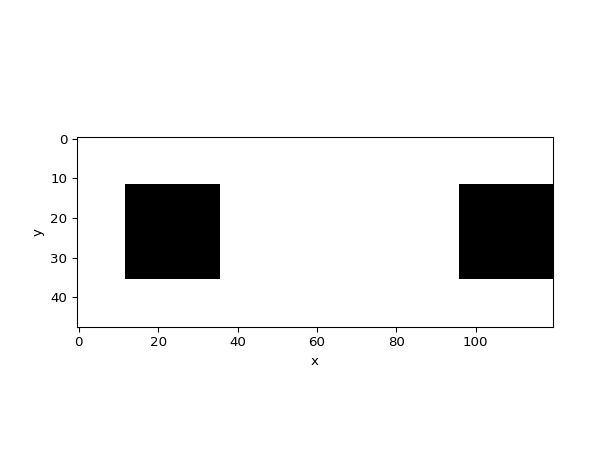

<AxesSubplot:xlabel='x', ylabel='y'>

In [2]:
import numpy as np
from nanomesh import Plane

n = 24
m = 12

data = np.ones([2*n, 5*n], dtype=int)
data[m:3*m, m:3*m] = 0
data[m:3*m, 4*n:5*n] = 0

print(data.shape)

plane = Plane(data)
plane.show()

### Generating the contour

The first step in mesh generation is to generate the contour.

<IPython.core.display.Javascript object>


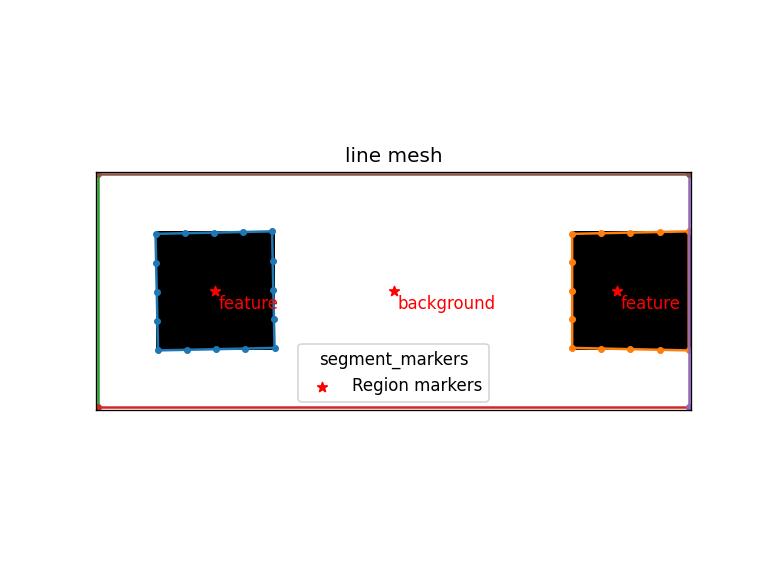

<AxesSubplot:title={'center':'line mesh'}>

In [3]:
from nanomesh.mesh2d import Mesher2D

mesher = Mesher2D(plane)
mesher.generate_contour()
mesher.plot_contour(legend='fields')

### Padding different sides

The mesh can be padded using a similar API as 3d meshes. Each side (top/bottom, left/right) can be padded. A width must be specified. 

Regions are labeled with a number. If no label is given, an arbitrary number is assigned. This is used to identify different regions in the mesh.

Padded areas can be given a name. Regions with the same name are assigned the same number.

<IPython.core.display.Javascript object>


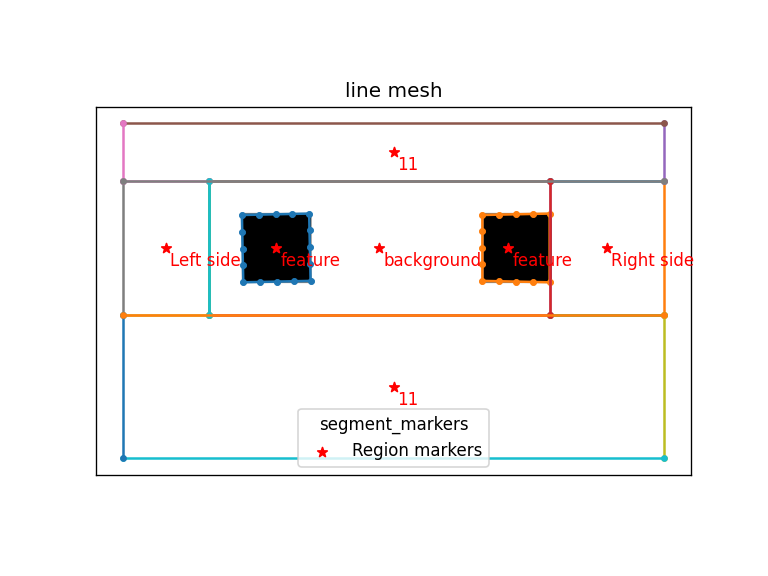

<AxesSubplot:title={'center':'line mesh'}>

In [4]:
mesher.pad_contour(side='left', width=30, name='Left side')
mesher.pad_contour(side='right', width=40, name='Right side')
mesher.pad_contour(side='top', width=20, label=11)
mesher.pad_contour(side='bottom', width=50, label=11)
mesher.plot_contour(legend='fields')

### Generate triagonal mesh

Finally, generate the triagonal mesh.

Note that the legend specifies the name of the region if available in the `.fields` attribute.

<IPython.core.display.Javascript object>


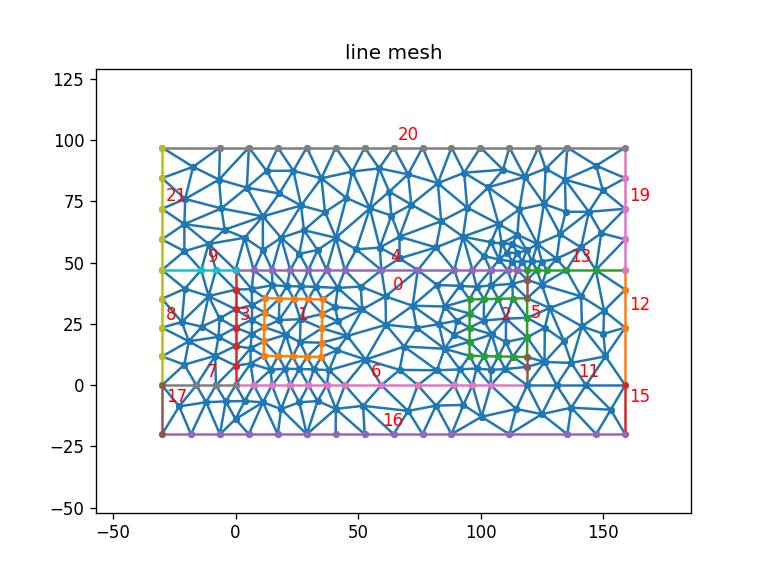

<AxesSubplot:title={'center':'line mesh'}>

In [5]:
mesh = mesher.triangulate(opts='pAq30a100e')
mesh.plot('line', legend='floating')

### Labelling outer boundaries

The outer boundaries can be labeled using the `LineMesh.label_boundaries` method.

The default `.cell_data` key is `'physical'`. This can be overridden using the `key='...'` parameter. To label the top and bottom boundaries, use the `top`, `bottom` parameters.

<IPython.core.display.Javascript object>


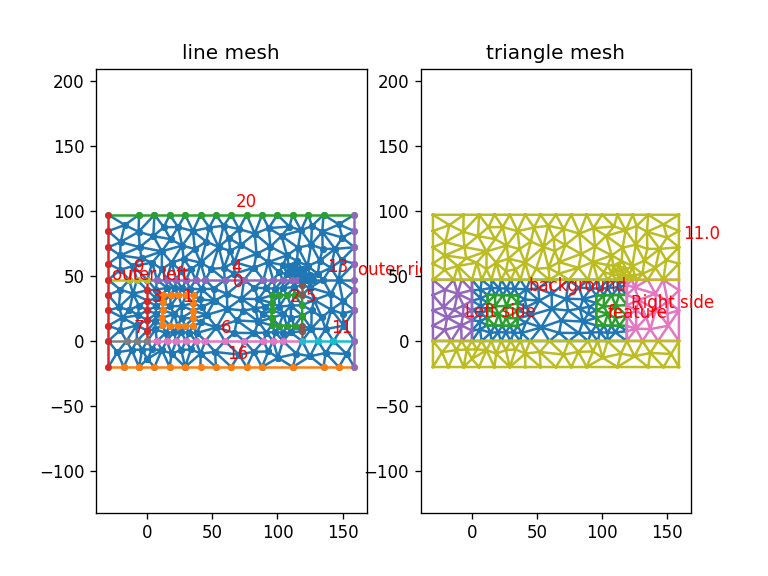

(<AxesSubplot:title={'center':'line mesh'}>,
 <AxesSubplot:title={'center':'triangle mesh'}>)

In [6]:
line_mesh = mesh.get('line')

line_mesh.label_boundaries(left='outer left', right='outer right')

# transfer labels back to MeshContainer
mesh.set_cell_data('line', 'physical', line_mesh.cell_data['physical'])
mesh.set_field_data('line', line_mesh.number_to_field)

mesh.plot(legend='floating')

### Padding left / right sides

The width, mesh quality, and label assigned to this this area can be defined.

This example shows how to double pad the left and right sides with different triangle sizes for each step.

<IPython.core.display.Javascript object>


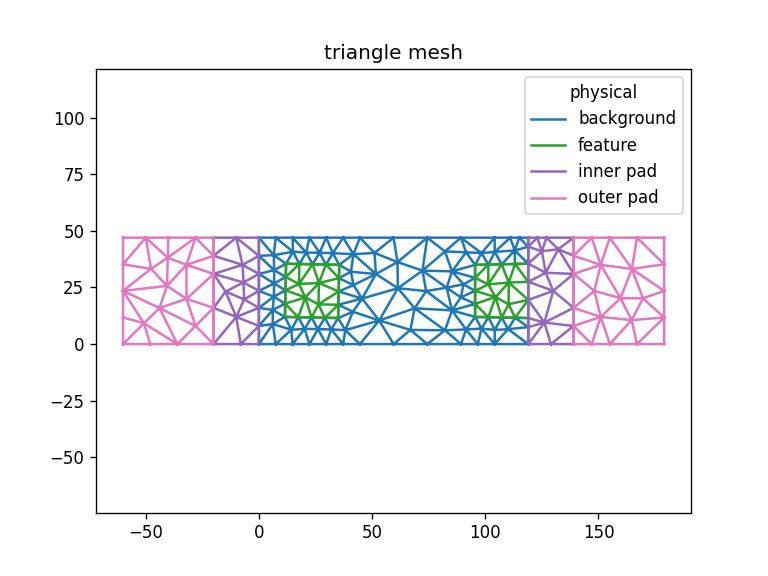

<AxesSubplot:title={'center':'triangle mesh'}>

In [7]:
mesher = Mesher2D(plane)
mesher.generate_contour()

mesher.pad_contour(side='left', width=20, label=30, name='inner pad')
mesher.pad_contour(side='left', width=40, label=40, name='outer pad')

mesher.pad_contour(side='right', width=20, label=30, name='inner pad')
mesher.pad_contour(side='right', width=40, label=40, name='outer pad')

padded_mesh = mesher.triangulate(opts='pAq30a100e')

padded_mesh.plot('triangle', legend='fields')

### Spiral mesh

This pattern is infinitely extensible. The example below shows the flexibility of the method.

<IPython.core.display.Javascript object>


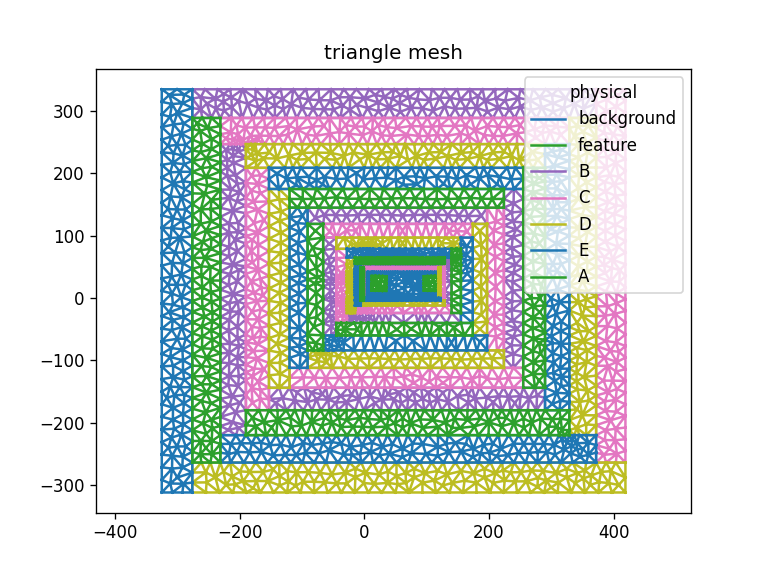

<AxesSubplot:title={'center':'triangle mesh'}>

In [8]:
from itertools import cycle
import numpy as np

mesher = Mesher2D(plane)
mesher.generate_contour()

choices = ('left', 'bottom', 'right', 'top')

for i, side in zip(range(1, 50), cycle(choices)):
    name = 'ABCDE'[i % 5]
    mesher.pad_contour(side=side, width=i, name=name)

spiral_mesh = mesher.triangulate(opts='pAq30a200e')    
    
spiral_mesh.plot('triangle', legend='fields')    